<a href="https://colab.research.google.com/github/kerenalli/Neural-Nets/blob/main/20210203_Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 1s 1ms/step - loss: 13.7997 - accuracy: 0.5791
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 4.4510 - accuracy: 0.5034
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 2.3764 - accuracy: 0.5064
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 1.0329 - accuracy: 0.5895
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9173 - accuracy: 0.5989
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8459 - accuracy: 0.5960
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7941 - accuracy: 0.6224
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 1.0243 - accuracy: 0.5823
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7955 - accuracy: 0.6545
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7362 - accuracy: 0.6663
Epoch 11

Epoch 1/400
39/39 - 1s - loss: 0.3572 - val_loss: 0.1517
Epoch 2/400
39/39 - 0s - loss: 0.1552 - val_loss: 0.1136
Epoch 3/400
39/39 - 0s - loss: 0.0862 - val_loss: 0.0854
Epoch 4/400
39/39 - 0s - loss: 0.0623 - val_loss: 0.0660
Epoch 5/400
39/39 - 0s - loss: 0.0476 - val_loss: 0.0517
Epoch 6/400
39/39 - 0s - loss: 0.0403 - val_loss: 0.0409
Epoch 7/400
39/39 - 0s - loss: 0.0345 - val_loss: 0.0334
Epoch 8/400
39/39 - 0s - loss: 0.0309 - val_loss: 0.0283
Epoch 9/400
39/39 - 0s - loss: 0.0277 - val_loss: 0.0236
Epoch 10/400
39/39 - 0s - loss: 0.0245 - val_loss: 0.0199
Epoch 11/400
39/39 - 0s - loss: 0.0222 - val_loss: 0.0178
Epoch 12/400
39/39 - 0s - loss: 0.0207 - val_loss: 0.0158
Epoch 13/400
39/39 - 0s - loss: 0.0207 - val_loss: 0.0147
Epoch 14/400
39/39 - 0s - loss: 0.0177 - val_loss: 0.0142
Epoch 15/400
39/39 - 0s - loss: 0.0174 - val_loss: 0.0135
Epoch 16/400
39/39 - 0s - loss: 0.0161 - val_loss: 0.0129
Epoch 17/400
39/39 - 0s - loss: 0.0163 - val_loss: 0.0128
Epoch 18/400
39/39 - 0s

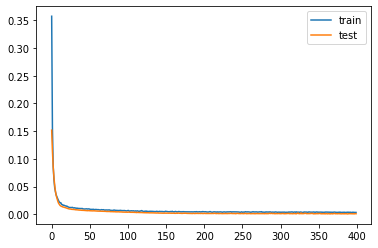

In [19]:
# train autoencoder for regression with no compression in the bottleneck layer
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [20]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
# define dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)


0.7662337662337663


Epoch 1/200
44/44 - 3s - loss: 0.5142 - val_loss: 0.1479
Epoch 2/200
44/44 - 0s - loss: 0.1938 - val_loss: 0.1127
Epoch 3/200
44/44 - 0s - loss: 0.0817 - val_loss: 0.0805
Epoch 4/200
44/44 - 0s - loss: 0.0490 - val_loss: 0.0590
Epoch 5/200
44/44 - 0s - loss: 0.0374 - val_loss: 0.0480
Epoch 6/200
44/44 - 0s - loss: 0.0312 - val_loss: 0.0430
Epoch 7/200
44/44 - 0s - loss: 0.0294 - val_loss: 0.0383
Epoch 8/200
44/44 - 0s - loss: 0.0274 - val_loss: 0.0347
Epoch 9/200
44/44 - 0s - loss: 0.0269 - val_loss: 0.0322
Epoch 10/200
44/44 - 0s - loss: 0.0249 - val_loss: 0.0291
Epoch 11/200
44/44 - 0s - loss: 0.0246 - val_loss: 0.0266
Epoch 12/200
44/44 - 0s - loss: 0.0233 - val_loss: 0.0254
Epoch 13/200
44/44 - 0s - loss: 0.0227 - val_loss: 0.0245
Epoch 14/200
44/44 - 0s - loss: 0.0219 - val_loss: 0.0239
Epoch 15/200
44/44 - 0s - loss: 0.0214 - val_loss: 0.0234
Epoch 16/200
44/44 - 0s - loss: 0.0210 - val_loss: 0.0222
Epoch 17/200
44/44 - 0s - loss: 0.0205 - val_loss: 0.0220
Epoch 18/200
44/44 - 0s

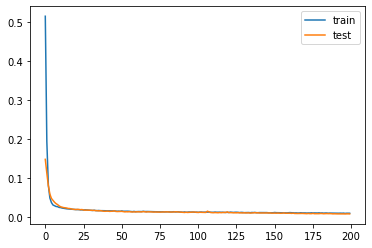

In [29]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 4
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [30]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
dataset = loadtxt('/content/drive/MyDrive/Classification/dia.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.7012987012987013
